In [1]:
from datasets import load_dataset
# ds = load_dataset("swaghjal/sherlock-train")
ds = load_dataset("swaghjal/sherlock-val")
# ds['train']


In [2]:
import pandas as pd
df = pd.DataFrame(ds['val'])

In [3]:
df

,split_idx,targets,inputs,instance_id
0,0,{'inference': 'people going to eat it'},"{'bboxes': [{'height': 168, 'left': 329, 'top'...",c344c9b7dbee3d5d5dfcfc66c245b737
1,0,{'inference': 'they are looking for a missing ...,"{'bboxes': [{'height': 365, 'left': 559, 'top'...",f46c7785704e8ab915330aa50db09efc
2,0,{'inference': 'The person who decorated this r...,"{'bboxes': [{'height': 72, 'left': 76, 'top': ...",bedb4b2276a195163fc6d0ec76a6aac6
3,0,{'inference': 'this is a classroom'},"{'bboxes': [{'height': 335, 'left': 434, 'top'...",513cd1e3e7db744a5a05afcc7005807b
4,0,{'inference': 'baseball games are sometimes pl...,"{'bboxes': [{'height': 93, 'left': 271, 'top':...",62c1e2bdc5ff1efd113c91bd5dd4b6d9
...,...,...,...,...
22732,22,{'inference': 'the plate is hot'},"{'bboxes': [{'height': 140, 'left': 257, 'top'...",c32336cc5dfa405fa2093f41ef472ea3
22733,22,{'inference': 'the cat had just fallen asleep ...,"{'bboxes': [{'height': 163, 'left': 196, 'top'...",d8674bb755f23ba5f38c658991ab46f9
22734,22,{'inference': 'the food is presented better'},"{'bboxes': [{'height': 303, 'left': 9, 'top': ...",02909db0ef4bbf1f058e7591a8f1ad0b
22735,22,{'inference': 'The cat had just hopped into th...,"{'bboxes': [{'height': 185, 'left': 116, 'top'...",fd49a5fe623335ba581fdb88c5c90868


In [4]:
i=2

In [5]:
df['inputs'].iloc[i]

{'bboxes': [{'height': 72, 'left': 76, 'top': 112, 'width': 91}],
 'clue': 'two pieces of wall art',
 'confidence': 1.0,
 'image': {'height': 333,
  'url': 'https://cs.stanford.edu/people/rak248/VG_100K/2371570.jpg',
  'width': 500},
 'obs_idx': 2}

In [7]:
df['targets'].iloc[i]

{'inference': 'The person who decorated this room likes old country art.'}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-package

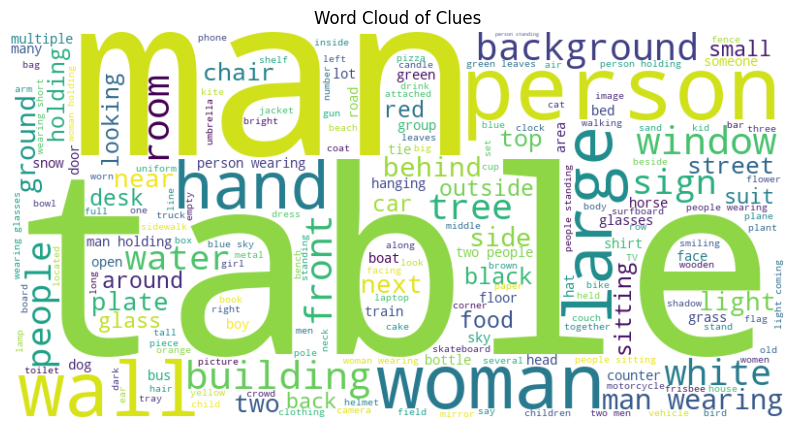

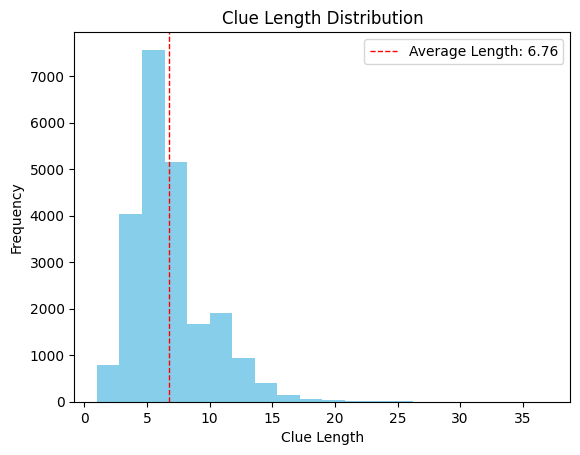

Average Clue Length: 6.756520209350398


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data if not already present
nltk.download('punkt')

# Extract clues from DataFrame
clues = [entry['clue'] for entry in df['inputs']]

# Calculate clue lengths
clue_lengths = [len(word_tokenize(clue)) for clue in clues]
average_length = sum(clue_lengths) / len(clue_lengths)

# Generate word cloud
text = ' '.join(clues)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clues')
plt.savefig('word_cloud_clues.jpg')
plt.show()

# Plot histogram of clue lengths
plt.hist(clue_lengths, bins=20, color='skyblue')
plt.title('Clue Length Distribution')
plt.xlabel('Clue Length')
plt.ylabel('Frequency')
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f'Average Length: {average_length:.2f}')
plt.legend()
plt.savefig('clue_length.jpg')
plt.show()

print("Average Clue Length:", average_length)

In [9]:
# !pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 812.7 kB/s eta 0:00:30
   ---------------------------------------- 0.2/24.0 MB 1.9 MB/s eta 0:00:13
   - -------------------------------------- 0.6/24.0 MB 4.4 MB/s eta 0:00:06
   --- ------------------------------------ 2.1/24.0 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 3.6/24.0 MB 15.3 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/24.0 MB 16.6 MB/s eta 0:00:02
   --------- ------------------------------ 5.8/24.0 MB 18.5 MB/s eta 0:00:01
   --------- ------------------------------ 5.8/24.0 MB 18.5 MB/s eta 0:00:01
   ------------- -------------------------- 7.9/24.0 MB 20.2 MB/s eta 0:00:01
   --------------- ------------------------ 9.4/24.0 MB 20.8 MB/s eta 0:00:01
   ----------------- ---------------------- 10.6/24.0 MB 26.2 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.042*"table" + 0.034*"open" + 0.028*"multiple" + 0.028*"counter" + 0.022*"bright" + 0.021*"windows" + 0.021*"long" + 0.021*"lights" + 0.019*"child" + 0.019*"three"
Topic 1: 0.049*"glass" + 0.048*"glasses" + 0.036*"table" + 0.035*"man" + 0.028*"person" + 0.022*"empty" + 0.021*"jacket" + 0.020*"inside" + 0.018*"camera" + 0.016*"bag"
Topic 2: 0.055*"near" + 0.055*"red" + 0.035*"room" + 0.034*"area" + 0.031*"floor" + 0.031*"boy" + 0.027*"cat" + 0.026*"tie" + 0.025*"yellow" + 0.022*"cup"
Topic 3: 0.053*"water" + 0.051*"white" + 0.046*"plate" + 0.031*"food" + 0.031*"car" + 0.028*"parked" + 0.020*"cars" + 0.019*"table" + 0.018*"door" + 0.018*"boat"
Topic 4: 0.145*"man" + 0.098*"wearing" + 0.085*"person" + 0.075*"woman" + 0.056*"holding" + 0.035*"hand" + 0.019*"suit" + 0.019*"hands" + 0.016*"shirt" + 0.014*"head"
Topic 5: 0.062*"ground" + 0.046*"men" + 0.045*"grass" + 0.027*"uniform" + 0.027*"field" + 0.024*"persons" + 0.023*"snow" + 0.022*"face" + 0.018*"brown" + 0.017*"green"
Topic

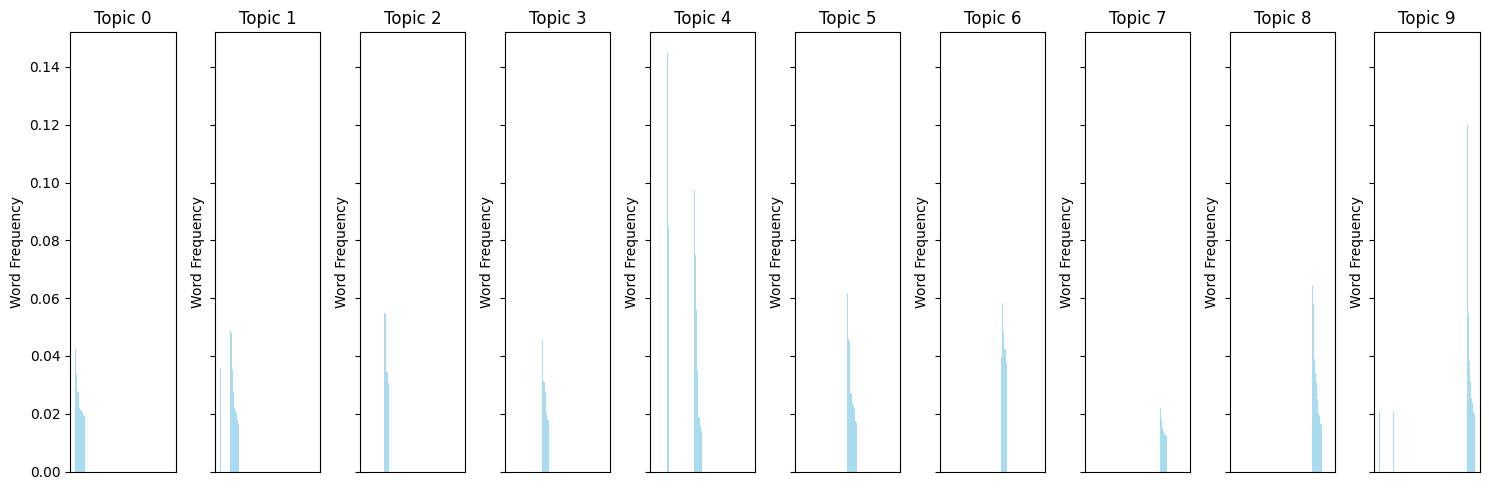

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Download NLTK data if not already present
nltk.download('punkt')
nltk.download('stopwords')

# Load DataFrame
# Assuming df is your DataFrame containing 'clue' data
clues = df['inputs'].apply(lambda x: x['clue']).tolist()

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
tokenized_clues = [word_tokenize(clue.lower()) for clue in clues]
tokenized_clues = [[word for word in tokens if word.isalnum() and word not in stop_words] for tokens in tokenized_clues]

# Create dictionary and corpus
dictionary = Dictionary(tokenized_clues)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_clues]

# Build LDA model
num_topics = 10  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_clues, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')

# Visualize topics
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(nrows=1, ncols=num_topics, figsize=(15, 5), sharex=True, sharey=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    ax.bar([str(word[0]) for word in topic[1]], [word[1] for word in topic[1]], color='skyblue', alpha=0.7)
    ax.set_title(f'Topic {i}')
    ax.set_xticks([])
    ax.set_ylabel('Word Frequency')
fig.tight_layout()
plt.show()


In [10]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:523: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\Sid\AppData\Local\Programs\Python\Python311\Lib\site-package

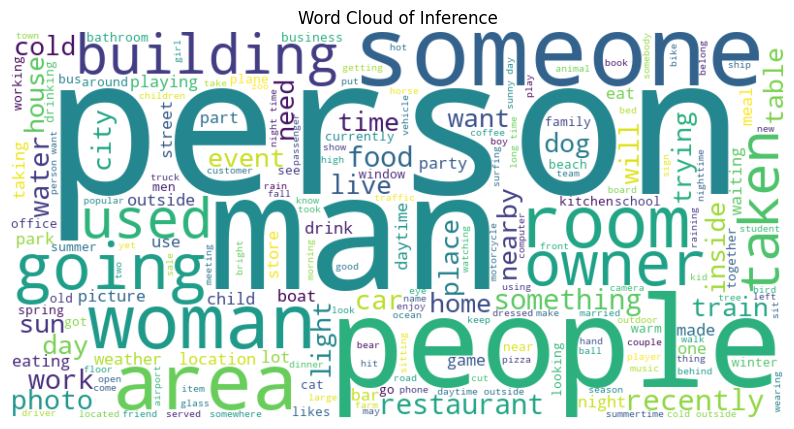

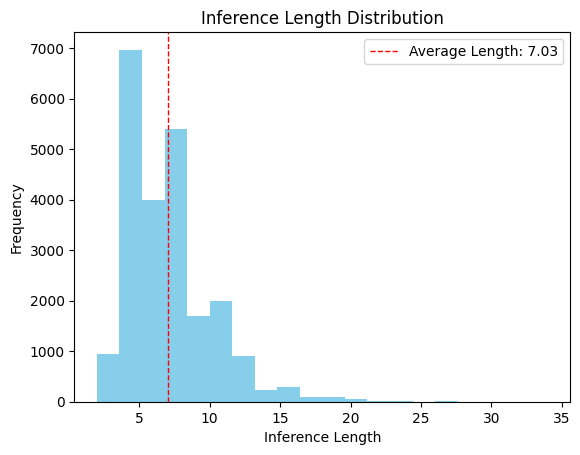

Average Inference Length: 7.033337731450939


In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data if not already present
nltk.download('punkt')

# Extract clues from DataFrame
clues = [entry['inference'] for entry in df['targets']]

# Calculate clue lengths
clue_lengths = [len(word_tokenize(clue)) for clue in clues]
average_length = sum(clue_lengths) / len(clue_lengths)

# Generate word cloud
text = ' '.join(clues)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Inference')
plt.savefig('world_cloud_inference.jpg')
plt.show()

# Plot histogram of clue lengths
plt.hist(clue_lengths, bins=20, color='skyblue')
plt.title('Inference Length Distribution')
plt.xlabel('Inference Length')
plt.ylabel('Frequency')
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f'Average Length: {average_length:.2f}')
plt.legend()
plt.savefig('inference_length.jpg')
plt.show()

print("Average Inference Length:", average_length)

In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Download NLTK data if not already present
nltk.download('punkt')
nltk.download('stopwords')

# Load DataFrame
# Assuming df is your DataFrame containing 'clue' data
clues = df['targets'].apply(lambda x: x['inference']).tolist()

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
tokenized_clues = [word_tokenize(clue.lower()) for clue in clues]
tokenized_clues = [[word for word in tokens if word.isalnum() and word not in stop_words] for tokens in tokenized_clues]

# Create dictionary and corpus
dictionary = Dictionary(tokenized_clues)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_clues]

# Build LDA model
num_topics = 10  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_clues, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')

# Visualize topics
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(nrows=1, ncols=num_topics, figsize=(15, 5), sharex=True, sharey=True)
for i, (topic, ax) in enumerate(zip(topics, axes.flatten())):
    ax.bar([str(word[0]) for word in topic[1]], [word[1] for word in topic[1]], color='skyblue', alpha=0.7)
    ax.set_title(f'Topic {i}')
    ax.set_xticks([])
    ax.set_ylabel('Word Frequency')
fig.tight_layout()
plt.show()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"bathroom" + 0.015*"two" + 0.014*"together"0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"bathroom" + 0.015*"two" + 0.014*"together"0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"bathroom" + 0.015*"two" + 0.014*"together"0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"bathroom" + 0.015*"two" + 0.014*"together"0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"bathroom" + 0.015*"two" + 0.014*"together"0.173*"people" + 0.021*"drinking" + 0.020*"someone" + 0.020*"daytime" + 0.017*"school" + 0.016*"working" + 0.016*"table" + 0.015*"b

22737
22737
22737
<class 'list'>
0.28969163


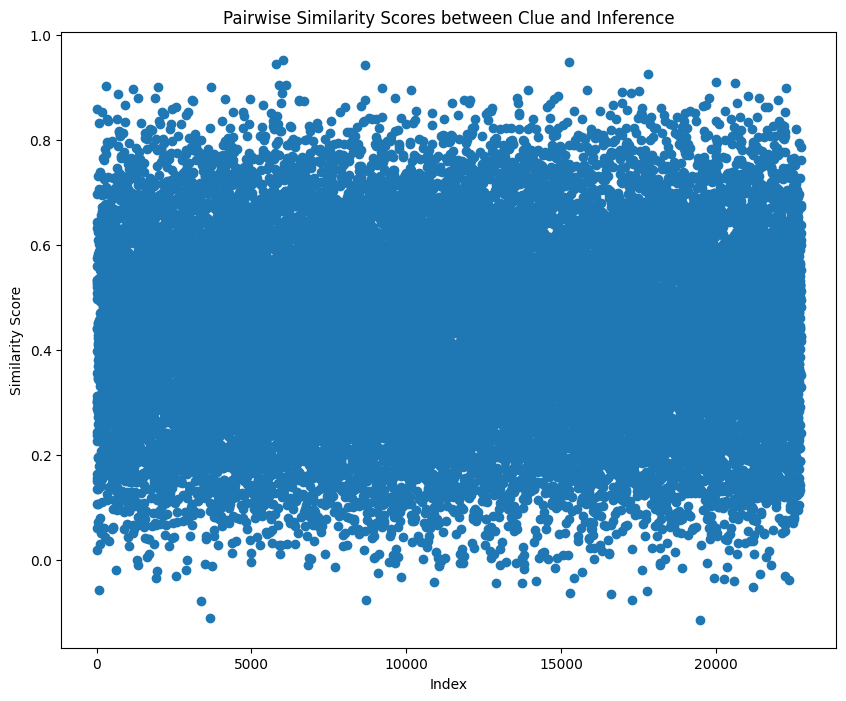

In [30]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
# nltk.download('punkt')

# Load Sentence-BERT model
model = SentenceTransformer('all-mpnet-base-v2')

# Function for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    return ' '.join(tokens)

# Load DataFrame
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your dataset path

# Preprocess 'clue' and 'inference' columns
inferences = df['targets'].apply(lambda x: x['inference']).tolist()
clues = df['inputs'].apply(lambda x: x['clue']).tolist()
# inferences = [preprocess_text(text) for text in inferences]
# clues = [preprocess_text(text) for text in clues]
print(len(clues))
print(len(inferences))

# Calculate sentence embeddings
clue_embeddings = model.encode(clues)
inference_embeddings = model.encode(inferences)

# Calculate cosine similarity
# similarity_scores = cosine_similarity(clue_embeddings, inference_embeddings)
pairwise_similarity_scores = []
for i in range(len(clues)):
    similarity_scores = cosine_similarity([clue_embeddings[i]], [inference_embeddings[i]])
    pairwise_similarity_scores.append(similarity_scores[0][0])
# similarity_scores = similarity_scores.flatten()
print(len(pairwise_similarity_scores))
print(type(pairwise_similarity_scores))
print((pairwise_similarity_scores[0]))
import seaborn 
plt.figure(figsize=(10, 8))
seaborn.kdeplot(pairwise_similarity_scores, shade=True)
plt.xlabel('SBERT Score')
plt.ylabel('Density')
plt.title('SBERT Score Distribution between Clue and Inference')
plt.savefig('sbert_score.jpg')
plt.show()


C:\Users\Sid\AppData\Local\Temp\ipykernel_11788\549390932.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(pairwise_similarity_scores, shade=True)


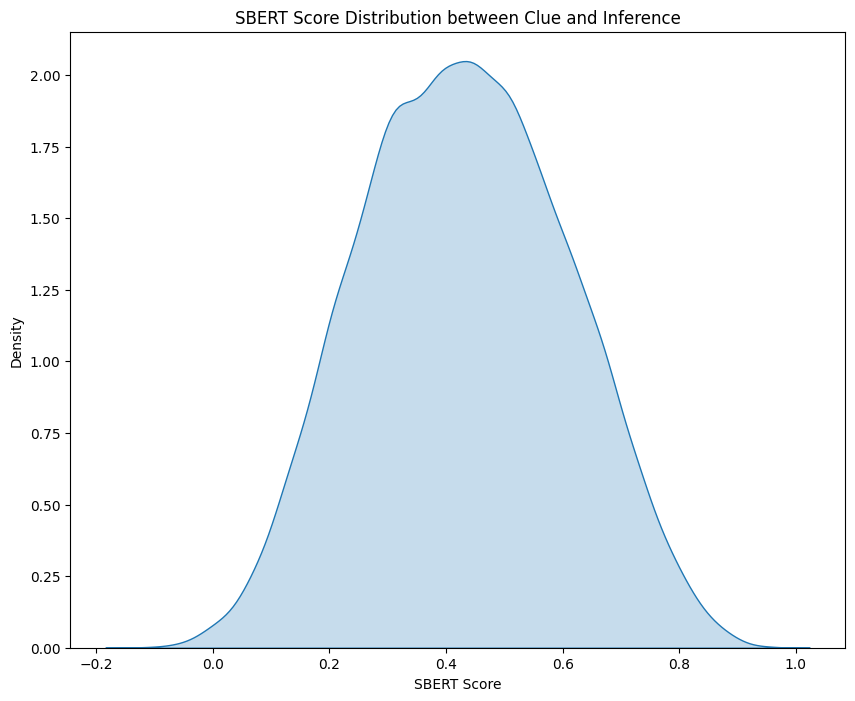

In [43]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))
def clean_text(headline):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(headline)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text

# Download NLTK data if not already present
nltk.download('wordnet')
nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('stopwords')

# Load DataFrame
# Assuming df is your DataFrame containing 'clue' data
inference = df['targets'].apply(lambda x: x['inference']).tolist()
inference = [clean_text(text) for text in inference]

vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(inference)

from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
            print("n")



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'english'} instead.